In [1]:
if (!require("rpart.plot")) install.packages("rpart.plot")

Loading required package: rpart.plot

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘rpart.plot’”



The downloaded binary packages are in
	/var/folders/w8/b7lznrkd1ss4fjmw6_hg9wkc0000gp/T//RtmpGwHVTE/downloaded_packages


In [7]:
# Load required package
library(rpart)
library(rpart.plot)  # For visualization
library(dplyr)
library(ggplot2)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [3]:
# Example dataset (with frequency weights)
df_weighted <- data.frame(
  Feature1 = c("A", "A", "B", "B", "C", "C"),
  Feature2 = c(1, 2, 1, 2, 1, 2),
  Target   = c("Y", "N", "Y", "N", "Y", "N"),
  Weight   = c(30, 40, 50, 10, 60, 50)  # Frequency weights
)

In [4]:
library(tidyr)


df <- df_weighted %>% 
uncount(Weight)

In [5]:
# Convert categorical variables to factors
df$Feature1 <- as.factor(df$Feature1)
df$Feature2 <- as.factor(df$Feature2)
df$Target <- as.factor(df$Target)

df_weighted$Feature1 <- as.factor(df_weighted$Feature1)
df_weighted$Feature2 <- as.factor(df_weighted$Feature2)
df_weighted$Target <- as.factor(df_weighted$Target)

In [8]:
df %>%
glimpse()

df_weighted %>%
glimpse()

Rows: 240
Columns: 3
$ Feature1 <fct> A, A, A, A, A, A, A, A, A, A, A, A, A, A, A, A, A, A, A, A, A…
$ Feature2 <fct> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…
$ Target   <fct> Y, Y, Y, Y, Y, Y, Y, Y, Y, Y, Y, Y, Y, Y, Y, Y, Y, Y, Y, Y, Y…
Rows: 6
Columns: 4
$ Feature1 <fct> A, A, B, B, C, C
$ Feature2 <fct> 1, 2, 1, 2, 1, 2
$ Target   <fct> Y, N, Y, N, Y, N
$ Weight   <dbl> 30, 40, 50, 10, 60, 50


In [9]:
# Build decision tree with frequency weighting
tree_model_weighted <- rpart(Target ~ Feature1 + Feature2, 
                     data = df_weighted, 
                     weights = Weight,  # Applying frequency weights
                     method = "class")  # Classification problem

# Print summary of tree
print(tree_model_weighted)

n= 6 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) root 6 100 Y (0.4166667 0.5833333) *


In [10]:
# Build decision tree with frequency weighting
tree_model <- rpart(Target ~ Feature1 + Feature2, 
                     data = df, 
#                      weights = Weight,  # Applying frequency weights
                     method = "class")  # Classification problem

# Print summary of tree
print(tree_model)

n= 240 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) root 240 100 Y (0.4166667 0.5833333)  
  2) Feature2=2 100   0 N (1.0000000 0.0000000) *
  3) Feature2=1 140   0 Y (0.0000000 1.0000000) *


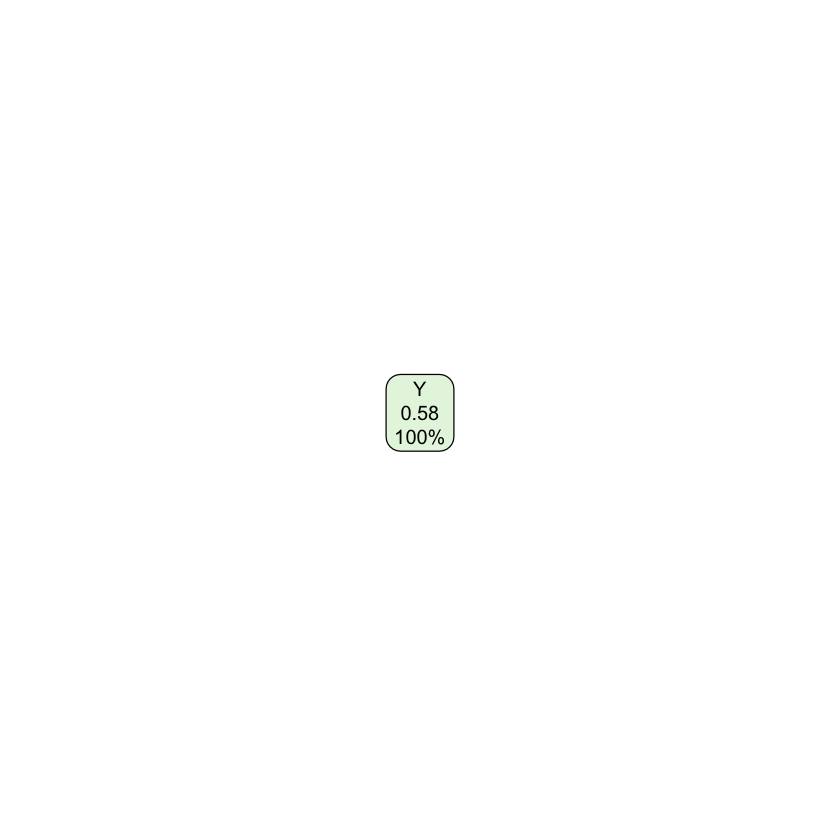

In [11]:
# Visualize the tree
rpart.plot(tree_model_weighted)

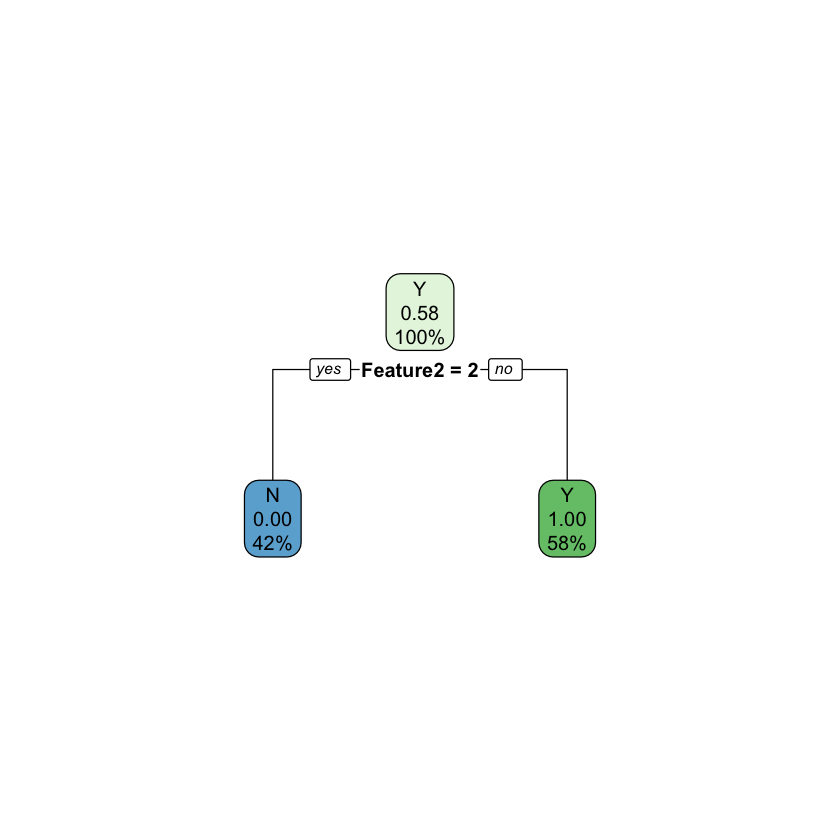

In [12]:
# Visualize the tree
rpart.plot(tree_model)

In [13]:
library(rpart)
library(rpart.plot)
data(iris)

In [14]:
iris %>%
glimpse()

Rows: 150
Columns: 5
$ Sepal.Length <dbl> 5.1, 4.9, 4.7, 4.6, 5.0, 5.4, 4.6, 5.0, 4.4, 4.9, 5.4, 4.…
$ Sepal.Width  <dbl> 3.5, 3.0, 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1, 3.7, 3.…
$ Petal.Length <dbl> 1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5, 1.5, 1.…
$ Petal.Width  <dbl> 0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.3, 0.2, 0.2, 0.1, 0.2, 0.…
$ Species      <fct> setosa, setosa, setosa, setosa, setosa, setosa, setosa, s…


In [15]:
tree_model <- rpart(Species ~ ., data = iris, method = "class")

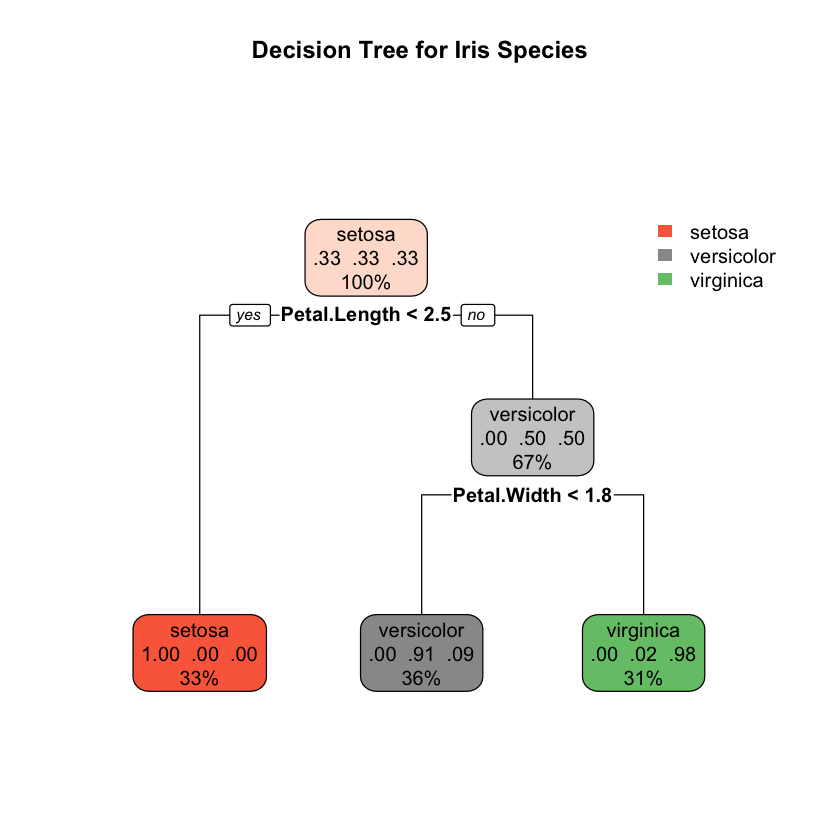

In [16]:
rpart.plot(tree_model, main = "Decision Tree for Iris Species")

In [17]:
print(tree_model)

n= 150 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) root 150 100 setosa (0.33333333 0.33333333 0.33333333)  
  2) Petal.Length< 2.45 50   0 setosa (1.00000000 0.00000000 0.00000000) *
  3) Petal.Length>=2.45 100  50 versicolor (0.00000000 0.50000000 0.50000000)  
    6) Petal.Width< 1.75 54   5 versicolor (0.00000000 0.90740741 0.09259259) *
    7) Petal.Width>=1.75 46   1 virginica (0.00000000 0.02173913 0.97826087) *


In [18]:
summary(tree_model)

Call:
rpart(formula = Species ~ ., data = iris, method = "class")
  n= 150 

    CP nsplit rel error xerror       xstd
1 0.50      0      1.00   1.24 0.04636090
2 0.44      1      0.50   0.78 0.06118823
3 0.01      2      0.06   0.09 0.02908608

Variable importance
 Petal.Width Petal.Length Sepal.Length  Sepal.Width 
          34           31           21           14 

Node number 1: 150 observations,    complexity param=0.5
  predicted class=setosa      expected loss=0.6666667  P(node) =1
    class counts:    50    50    50
   probabilities: 0.333 0.333 0.333 
  left son=2 (50 obs) right son=3 (100 obs)
  Primary splits:
      Petal.Length < 2.45 to the left,  improve=50.00000, (0 missing)
      Petal.Width  < 0.8  to the left,  improve=50.00000, (0 missing)
      Sepal.Length < 5.45 to the left,  improve=34.16405, (0 missing)
      Sepal.Width  < 3.35 to the right, improve=19.03851, (0 missing)
  Surrogate splits:
      Petal.Width  < 0.8  to the left,  agree=1.000, adj=1.00, (0 spl

In [19]:
predictions <- predict(tree_model, iris, type = "class")
table(iris$Species, predictions)

            predictions
             setosa versicolor virginica
  setosa         50          0         0
  versicolor      0         49         1
  virginica       0          5        45

In [20]:
# Create frequency weights (example: weight by species count)
weights <- as.numeric(ave(iris$Petal.Length, iris$Petal.Width, FUN = length))
weights

[1] 29 29 29 29 29  7  7 29 29  5 29 29  5  5 29  7  7  7  7  7 29  7 29  1 29
 [26] 29  7 29 29 29 29  7  5 29 29 29 29  5 29 29  7  7 29  1  7  7 29 29 29 29
 [51]  8 12 12 13 12 13  4  7 13  8  7 12  7  8 13  8 12  7 12  3 12 13 12  5 13
 [76]  8  8  2 12  7  3  7  5  4 12  4 12 13 13 13  5  8  5  7 13  5 13 13  3 13
[101]  3  5  6 12  3  6  2 12 12  3  6  5  6  6  3  8 12  3  8 12  8  6  6 12  6
[126] 12 12 12  6  4  5  6  3 12  8  8  3 12 12  6  3  8  5  8  3  8  5  6  8 12

In [21]:
iris_grouped <- iris %>%
group_by(Petal.Length, Petal.Width, Sepal.Length, Sepal.Width, Species) %>%
summarise(weight = n()) %>%
ungroup()

`summarise()` has grouped output by 'Petal.Length', 'Petal.Width', 'Sepal.Length',
'Sepal.Width'. You can override using the `.groups` argument.


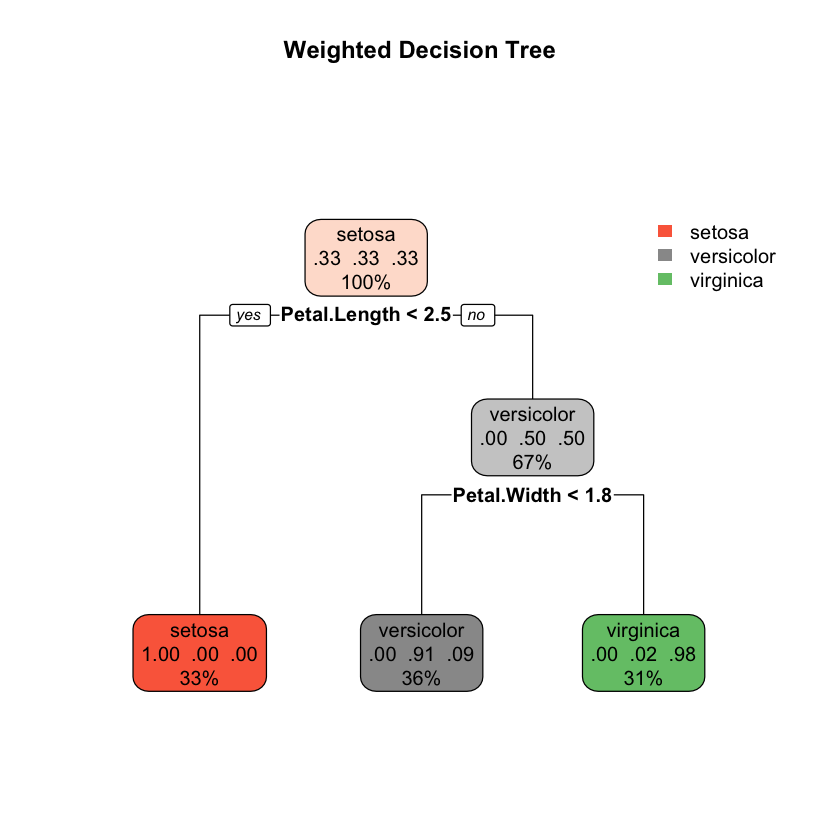

In [22]:
weighted_tree <- rpart(Species ~ ., data = iris_grouped, weights = weight, method = "class")
rpart.plot(weighted_tree, main = "Weighted Decision Tree")

In [23]:


# # 2. Weighted Regression Tree
# data(mtcars)
# # Weight by cylinder count
# mtcars$wt <- ave(mtcars$mpg, mtcars$cyl, FUN = function(x) length(x)/nrow(mtcars))

# weighted_reg <- rpart(mpg ~ ., data = mtcars, weights = wt, method = "anova")
# rpart.plot(weighted_reg, main = "Weighted Regression Tree")
